In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
iris = load_iris()

clf = DecisionTreeClassifier(max_depth = 2,         # 트리의 최대 깊이
                             min_samples_split = 2, # 자식 노드를 분할하는데 필요한 최소 샘플 수
                             min_samples_leaf = 1,  # 리프 노드에 있어야 할 최소 샘플 수
                             max_features = None,   # 최대 X 열의 개수
                             random_state = 121,    # 난수 seed 설정
                             max_leaf_nodes = None  # 최대 리프 노드의 개수      
                             )

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = .2, random_state = 11)

clf.fit(X_train, y_train)

pred = clf.predict(X_test)

print(accuracy_score(pred, y_test))

0.8666666666666667


In [3]:
# GridSearchCV
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier(random_state = 156)

param_grid = {}
param_grid['max_depth'] = [None, 5, 10, 20, 30]
param_grid['min_samples_split'] = [2, 5, 10]
param_grid['min_samples_leaf'] = [1, 2, 4]

grid = GridSearchCV(estimator = clf, param_grid = param_grid, cv = 5, scoring = 'accuracy')

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=156),
             param_grid={'max_depth': [None, 5, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [4]:
print('최적의 파라미터:', grid.best_params_)
print('최적의 학습 모델의 정확도:', grid.best_score_)

clf = grid.best_estimator_

clf.fit(X_train, y_train)
pred = clf.predict(X_test)

print(accuracy_score(pred, y_test))

최적의 파라미터: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
최적의 학습 모델의 정확도: 0.95
0.9333333333333333


In [5]:
from sklearn.tree import export_graphviz
export_graphviz(clf, out_file = 'tree.dot', class_names = iris.target_names, feature_names = iris.feature_names, impurity = True, filled = True)

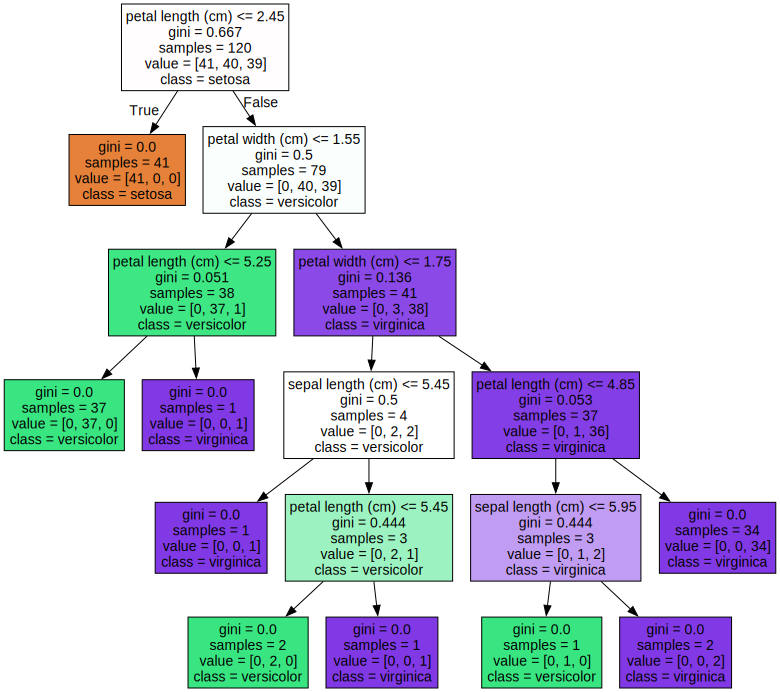

In [6]:
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

In [7]:
clf.feature_importances_

array([0.02500521, 0.        , 0.55490281, 0.42009198])

In [8]:
for name, value in zip(iris.feature_names, clf.feature_importances_):
    print(name, value)

sepal length (cm) 0.02500520941862888
sepal width (cm) 0.0
petal length (cm) 0.5549028149313102
petal width (cm) 0.42009197565006084


In [10]:
from sklearn.datasets import make_moons
# 데이터 생성
X, y = make_moons(n_samples = 300, noise = 0.25, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# 결정 트리 모델 학습
tree_deep = DecisionTreeClassifier(max_depth = None, random_state = 42)
tree_shallow = DecisionTreeClassifier(max_depth = 5, random_state = 42)
tree_deep.fit(X_train, y_train)
tree_shallow.fit(X_train, y_train)

# 학습 데이터에 대한 정확도
y_train_pred_overfit, y_train_pred_regularized  = tree_deep.predict(X_train), tree_shallow.predict(X_train)
train_accuracy_overfit = accuracy_score(y_train, y_train_pred_overfit)
train_accuracy_regularized = accuracy_score(y_train, y_train_pred_regularized)

# 테스트 데이터에 대한 정확도
y_test_pred_overfit, y_test_pred_regularized = tree_deep.predict(X_test), tree_shallow.predict(X_test)
test_accuracy_overfit = accuracy_score(y_test, y_test_pred_overfit)
test_accuracy_regularized = accuracy_score(y_test, y_test_pred_regularized)


# 결과 출력
print(f"Overfitting Model - Training Accuracy: {train_accuracy_overfit:.4f}")
print(f"Overfitting Model - Test Accuracy: {test_accuracy_overfit:.4f}")
print(f"Regularized Model - Training Accuracy: {train_accuracy_regularized:.4f}")
print(f"Regularized Model - Test Accuracy: {test_accuracy_regularized:.4f}")

Overfitting Model - Training Accuracy: 1.0000
Overfitting Model - Test Accuracy: 0.9222
Regularized Model - Training Accuracy: 0.9619
Regularized Model - Test Accuracy: 0.9333
